<a href="https://colab.research.google.com/github/TanyaShamis1710/my_repo1/blob/hometask_6/hometask_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(narr):
    '''Plots 2d lattice with vertices colored in black and red according to given mask.
    Vertice is colored black if narr[i, j] == True and red otherwise.
    
    Parameters
    ----------
    narr : 2d boolean ndarray
        Mask for vertices colors
    '''

    if narr.dtype != 'bool':
        raise ValueError('narr should be a boolean ndarray')
    colors = np.empty(narr.shape, dtype='U5')
    colors[:] = 'blue'
    colors[narr] = 'red'
    x, y = np.indices((narr.shape))
    plt.scatter(x, y, c=colors.ravel())
    plt.show()


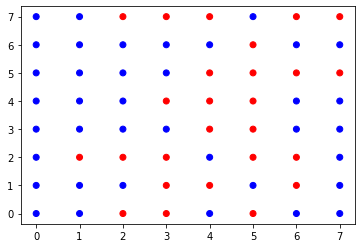

In [2]:
size = 8
narr = np.random.choice([0, 1], size=size**2).reshape((size, size)).astype('bool')

plot_grid(narr)

In [0]:
def is_ok(a, i, j):
    n = len(a)
    flag = True
    if i > 0 and a[i-1,j]:
        flag = False
    if i < n-1 and a[i+1,j]:
        flag = False
    if j > 0 and a[i,j-1]:
        flag = False
    if j < n-1 and a[i,j+1]:
        flag = False
    return flag

def gen(size):
    N = 400
    narr = np.array([False for i in range(size**2)]).reshape((size,size))
    
    for i in range(N):
        i, j = np.random.randint(0, size, 2)
        alpha = np.random.binomial(1, 0.5)
        if alpha == 1 and is_ok(narr, i, j):
            narr[i,j] = True
        elif alpha == 0:
            narr[i,j] = False
    
    return narr

def num_colored(a):
    return np.sum(a)

In [0]:
size = 8
N = 2500
lst = np.array([num_colored(gen(size)) for i in range(N)])


In [5]:
np.mean(lst)

15.2708

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


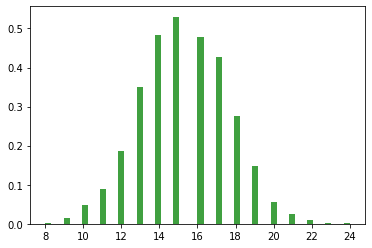

In [6]:
plt.hist(lst, bins=50, normed=True, facecolor='g', alpha=0.75)
plt.show()

In [0]:
from scipy import stats
def g_test(x, start=0.1, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

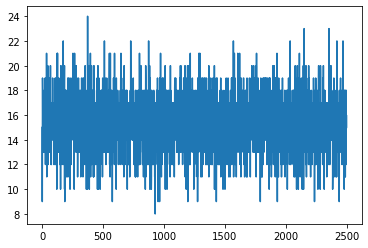

Ttest_indResult(statistic=0.8039134649950629, pvalue=0.4222856492611332)

In [8]:

post = lst
plt.plot(post)
plt.show()

g_test(post[1000:])

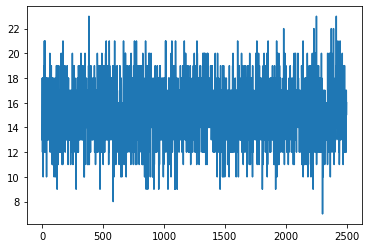

Ttest_indResult(statistic=-0.6925052044819152, pvalue=0.4890855204044332)

In [9]:

post = lst
plt.plot(post)
plt.show()

g_test(post[100:])

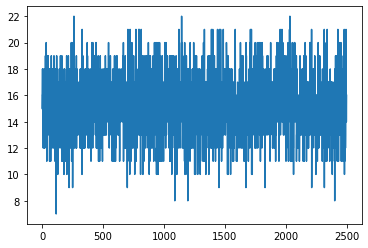

Ttest_indResult(statistic=0.4839432316636352, pvalue=0.6299960988918889)

In [15]:
size = 8
N = 2500
lst = np.array([num_colored(gen(size)) for i in range(N)])

post = lst
plt.plot(post)
plt.show()

g_test(post[2000:])

Вывод: гипотеза стаионарности подтвердилась